In [2]:
import pandas as pd
import numpy as np

train = pd.read_csv('bda-image-challenge-train.txt', header = None)
print(np.shape(train))

test = pd.read_csv("bda-image-challenge-row-testdist.txt", header=None)
print(np.shape(test))

(9200, 1024)
(920, 1025)


In [3]:
image_test = test.values[:, 1:]
image_test=image_test.reshape(920, 32, 32)
n1 = len(image_test)
print(image_test.shape)

(920, 32, 32)


In [4]:
y_test = image_test[:, 8:24, 8:24].reshape(n1, -1)
x_test = image_test.copy()

x_test = x_test.reshape(n1, -1)

print(x_test.shape)
print(y_test.shape)

(920, 1024)
(920, 256)


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score as r2
from sklearn import preprocessing

In [6]:
image = train.values.reshape(9200, 32, 32)
n = len(image)

y = image[:, 8:24, 8:24].reshape(n, -1)
x = image.copy()

x[:, 8:24, 8:24] = 0
x = x.reshape(n, -1)

print(x.shape)
print(y.shape)

(9200, 1024)
(9200, 256)


# Regression based on KNN

In [17]:
from sklearn.neighbors import KNeighborsRegressor

clf = KNeighborsRegressor(n_neighbors=2)
clf.fit(x, y)
y_pred = clf.predict(x)

In [169]:
#from sklearn.neural_network import MLPRegressor

#clf = MLPRegressor()
#clf.fit(x, y)
#y_pred = clf.predict(x)

KNN Regression: 
MSE:  0.04779457271703143
R2-score:  0.7313465630450249


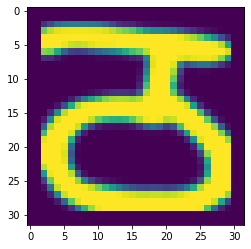

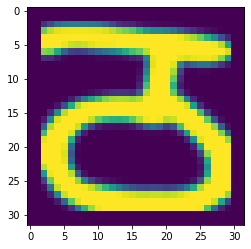

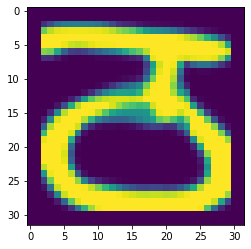

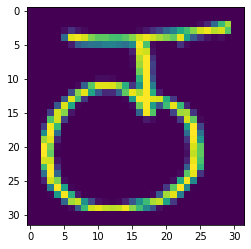

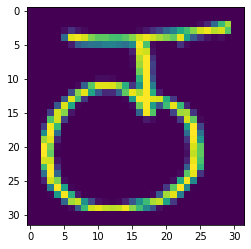

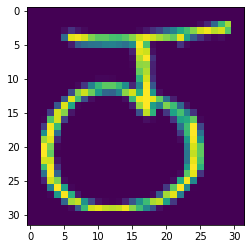

In [18]:
print("KNN Regression: ")
print("MSE: ", mean_squared_error(y, y_pred))
print("R2-score: ", r2(y, y_pred))

for i in range(2):
    im1 = x[30+i].reshape(32, 32)
    im2 = im1.copy()
    im3=im1.copy()
    im1[8:24, 8:24] = y[30+i].reshape(16, 16)
    im2[8:24, 8:24] = y_pred[30+i].reshape(16, 16)
    plt.imshow(im3.reshape(32, 32))
    plt.show()
    plt.imshow(im1.reshape(32, 32))
    plt.show()
    plt.imshow(im2.reshape(32, 32))
    plt.show()    

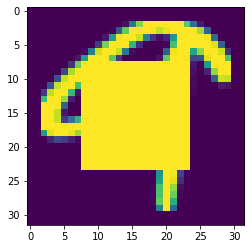

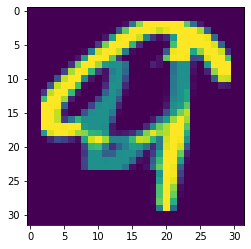

In [19]:
y_predtest = clf.predict(x_test)
im1 = x_test[221].reshape(32, 32)
im2 = im1.copy()
im1[8:24, 8:24] = y_test[221].reshape(16, 16)
im2[8:24, 8:24] = y_predtest[221].reshape(16, 16)
plt.imshow(im1.reshape(32, 32))
plt.show()
plt.imshow(im2.reshape(32, 32))
plt.show()

# Regression based on Decision Tree

In [32]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)
dt.fit(x, y)
y_pred = dt.predict(x)

Decision Tree Regression: 
MSE:  0.0
R2-score:  1.0


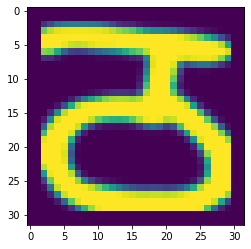

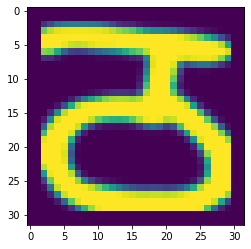

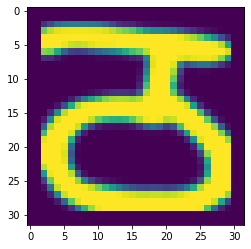

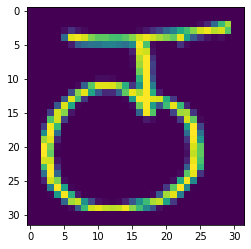

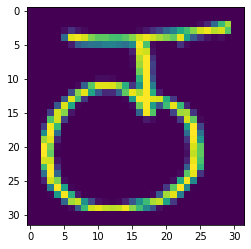

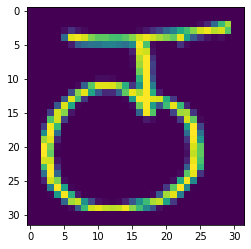

In [33]:
print("Decision Tree Regression: ")
print("MSE: ", mean_squared_error(y, y_pred))
print("R2-score: ", r2(y, y_pred))

for i in range(2):
    im1 = x[30+i].reshape(32, 32)
    im2 = im1.copy()
    im3=im1.copy()
    im1[8:24, 8:24] = y[30+i].reshape(16, 16)
    im2[8:24, 8:24] = y_pred[30+i].reshape(16, 16)
    plt.imshow(im3.reshape(32, 32))
    plt.show()
    plt.imshow(im1.reshape(32, 32))
    plt.show()
    plt.imshow(im2.reshape(32, 32))
    plt.show()  

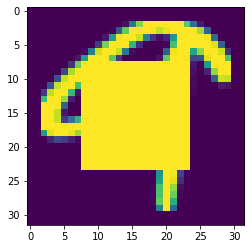

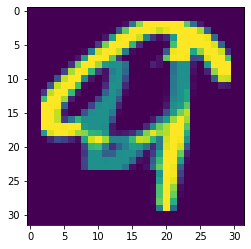

In [34]:
y_predtest = clf.predict(x_test)
im1 = x_test[221].reshape(32, 32)
im2 = im1.copy()
im1[8:24, 8:24] = y_test[221].reshape(16, 16)
im2[8:24, 8:24] = y_predtest[221].reshape(16, 16)
plt.imshow(im1.reshape(32, 32))
plt.show()
plt.imshow(im2.reshape(32, 32))
plt.show()